In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold

dietary = pd.read_csv('dietary.csv') 
diary_data_encoded = pd.get_dummies(dietary, columns=['food type'])
diary_data_encoded = diary_data_encoded.replace({True: 1, False: 0})

# dietary = dietary.dropna(how='any')
dietary.describe()


,Total saturated fatty acids,Total monounsaturated fatty acids,Total polyunsaturated fatty acids,Energy,Protein,Carbohydrate,Sugars,Dietary Fiber,Total Fat
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.782047,1.662838,1.306829,111.860331,3.611229,12.829350,5.752405,0.814793,5.205953
std,3.519779,3.313627,3.558444,156.113141,7.835908,20.016995,11.332683,1.667280,9.492915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007000,0.006000,0.011000,13.000000,0.130000,0.750000,0.150000,0.000000,0.060000
50%,0.383000,0.358500,0.150000,59.000000,0.920000,4.490000,1.500000,0.100000,1.550000
75%,1.985750,1.864000,0.976000,151.000000,4.150000,16.465000,5.810000,1.000000,6.525000
max,59.187000,40.483000,94.371000,2752.000000,162.510000,281.000000,210.640000,26.400000,181.360000


In [11]:
diary_data_encoded

,Total saturated fatty acids,Total monounsaturated fatty acids,Total polyunsaturated fatty acids,Energy,Protein,Carbohydrate,Sugars,Dietary Fiber,Total Fat,food type_baking,food type_fried,food type_heat or cook,food type_w/o heat or cook
0,0.531,0.447,1.168,184.0,8.92,31.26,3.20,4.4,2.58,1,0,0,0
1,9.589,3.924,0.568,134.0,0.16,0.01,0.01,0.0,15.14,1,0,0,0
2,0.000,0.000,0.000,40.0,0.00,10.06,10.06,0.0,0.00,0,0,0,1
3,2.220,0.106,0.027,24.0,0.24,0.58,0.35,0.2,2.50,0,0,0,1
4,0.000,0.000,0.000,3.0,0.18,0.51,0.05,0.1,0.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,5.382,0.447,0.097,107.0,0.45,13.97,12.70,0.9,6.36,0,0,0,1
3626,0.196,0.115,0.291,161.0,1.73,38.86,15.43,1.0,0.73,0,0,1,0
3627,1.919,0.691,0.100,86.0,5.79,8.49,8.45,0.0,3.28,0,0,1,0
3628,1.142,0.381,0.571,238.0,3.36,55.83,21.89,5.9,2.16,0,0,1,0


In [22]:
X = diary_data_encoded.drop(columns=diary_data_encoded.columns[0:3])
X

,Energy,Protein,Carbohydrate,Sugars,Dietary Fiber,Total Fat,food type_baking,food type_fried,food type_heat or cook,food type_w/o heat or cook
0,184.0,8.92,31.26,3.20,4.4,2.58,1,0,0,0
1,134.0,0.16,0.01,0.01,0.0,15.14,1,0,0,0
2,40.0,0.00,10.06,10.06,0.0,0.00,0,0,0,1
3,24.0,0.24,0.58,0.35,0.2,2.50,0,0,0,1
4,3.0,0.18,0.51,0.05,0.1,0.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3625,107.0,0.45,13.97,12.70,0.9,6.36,0,0,0,1
3626,161.0,1.73,38.86,15.43,1.0,0.73,0,0,1,0
3627,86.0,5.79,8.49,8.45,0.0,3.28,0,0,1,0
3628,238.0,3.36,55.83,21.89,5.9,2.16,0,0,1,0


In [23]:
cv = KFold(n_splits=5, shuffle=True, random_state=2)

for i in range(3):
    print(dietary.columns[i])
    y = diary_data_encoded[diary_data_encoded.columns[i]]
    
    # Ordinary Linear Regression
    linear_regressor = LinearRegression()
    linear_r2_scores = cross_val_score(linear_regressor, X, y, cv=5, scoring='r2')
    print(f"Ordinary Linear Regression Average R^2 Score: {np.mean(linear_r2_scores)}")

    # KNN
    knn_regressor = KNeighborsRegressor()
    knn_r2_scores = cross_val_score(knn_regressor, X, y, cv=5, scoring='r2')
    print(f"KNN Average R^2 Score: {np.mean(knn_r2_scores)}")

    # SVM Regressor
    svr_model = SVR()
    svr_r2_scores = cross_val_score(svr_model, X, y, cv=5, scoring='r2')
    print(f"SVM Average R^2 Score: {np.mean(svr_r2_scores)}")

    # Decision Tree Regressor
    tree_regressor = DecisionTreeRegressor(random_state=2)
    tree_r2_scores = cross_val_score(tree_regressor, X, y, cv=5, scoring='r2')
    print(f"Decision Tree Regressor Average R^2 Score: {np.mean(tree_r2_scores)}")
    
    # Random Forest Regressor
    rf_regressor = RandomForestRegressor(random_state=2)
    rf_r2_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2')
    print(f"Random Forest Average R^2 Score: {np.mean(rf_r2_scores)}")

    # Gradient Boosting Regressor
    gb_regressor = GradientBoostingRegressor(random_state=2)
    gb_r2_scores = cross_val_score(gb_regressor, X, y, cv=5, scoring='r2')
    print(f"Gradient Boosting Regressor Average R^2 Score: {np.mean(gb_r2_scores)}")


Total saturated fatty acids
Ordinary Linear Regression Average R^2 Score: 0.7470887566577591
KNN Average R^2 Score: 0.7234311251202763
SVM Average R^2 Score: 0.5717409510345816
Decision Tree Regressor Average R^2 Score: 0.5798320518374187
Random Forest Average R^2 Score: 0.8163341714738565
Gradient Boosting Regressor Average R^2 Score: 0.7835252544837678
Total monounsaturated fatty acids
Ordinary Linear Regression Average R^2 Score: 0.822756960991011
KNN Average R^2 Score: 0.7894712293255371
SVM Average R^2 Score: 0.7481844359207669
Decision Tree Regressor Average R^2 Score: 0.8368805548614677
Random Forest Average R^2 Score: 0.8988809541301743
Gradient Boosting Regressor Average R^2 Score: 0.8920576237718458
 Total polyunsaturated fatty acids
Ordinary Linear Regression Average R^2 Score: 0.6506121571147802
KNN Average R^2 Score: 0.5349705856783151
SVM Average R^2 Score: 0.38481512170269094
Decision Tree Regressor Average R^2 Score: 0.6867021817898472
Random Forest Average R^2 Score: 0

In [24]:
columns_to_scale = diary_data_encoded.columns[:-4]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(diary_data_encoded[columns_to_scale])

scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

X_scaled = pd.concat([scaled_df, diary_data_encoded.iloc[:, -4:]], axis=1)
X = X_scaled.drop(columns=X_scaled.columns[0:3])
X

,Energy,Protein,Carbohydrate,Sugars,Dietary Fiber,Total Fat,food type_baking,food type_fried,food type_heat or cook,food type_w/o heat or cook
0,0.462162,0.677586,0.920877,-0.225256,2.150629,-0.276661,1,0,0,0
1,0.141838,-0.440498,-0.640512,-0.506782,-0.488764,1.046614,1,0,0,0
2,-0.460373,-0.460920,-0.138369,0.380156,-0.488764,-0.548480,0,0,0,1
3,-0.562877,-0.430287,-0.612032,-0.476776,-0.368791,-0.285089,0,0,0,1
4,-0.697413,-0.437946,-0.615529,-0.503252,-0.428777,-0.548480,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3625,-0.031138,-0.403484,0.056992,0.613143,0.051112,0.121586,0,0,0,1
3626,0.314813,-0.240111,1.300607,0.854072,0.111098,-0.471570,0,0,1,0
3627,-0.165674,0.278088,-0.216813,0.238070,-0.488764,-0.202911,0,0,1,0
3628,0.808113,-0.032066,2.148503,1.424183,3.050422,-0.320910,0,0,1,0


In [21]:
cv = KFold(n_splits=5, shuffle=True, random_state=2)

for i in range(3):
    print(dietary.columns[i])
    y = diary_data_encoded[diary_data_encoded.columns[i]]
    
    # Ordinary Linear Regression
    linear_regressor = LinearRegression()
    linear_r2_scores = cross_val_score(linear_regressor, X, y, cv=5, scoring='r2')
    print(f"Ordinary Linear Regression Average R^2 Score: {np.mean(linear_r2_scores)}")

    # KNN
    knn_regressor = KNeighborsRegressor()
    knn_r2_scores = cross_val_score(knn_regressor, X, y, cv=5, scoring='r2')
    print(f"KNN Average R^2 Score: {np.mean(knn_r2_scores)}")

    # SVM Regressor
    svr_model = SVR()
    svr_r2_scores = cross_val_score(svr_model, X, y, cv=5, scoring='r2')
    print(f"SVM Average R^2 Score: {np.mean(svr_r2_scores)}")

    # Decision Tree Regressor
    tree_regressor = DecisionTreeRegressor(random_state=2)
    tree_r2_scores = cross_val_score(tree_regressor, X, y, cv=5, scoring='r2')
    print(f"Decision Tree Regressor Average R^2 Score: {np.mean(tree_r2_scores)}")
    
    # Random Forest Regressor
    rf_regressor = RandomForestRegressor(random_state=2)
    rf_r2_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2')
    print(f"Random Forest Average R^2 Score: {np.mean(rf_r2_scores)}")

    # Gradient Boosting Regressor
    gb_regressor = GradientBoostingRegressor(random_state=2)
    gb_r2_scores = cross_val_score(gb_regressor, X, y, cv=5, scoring='r2')
    print(f"Gradient Boosting Regressor Average R^2 Score: {np.mean(gb_r2_scores)}")


Total saturated fatty acids
Ordinary Linear Regression Average R^2 Score: 0.7470951086884672
KNN Average R^2 Score: 0.7728837378352946
SVM Average R^2 Score: 0.6558456641756583
Decision Tree Regressor Average R^2 Score: 0.5794988585418535
Random Forest Average R^2 Score: 0.8166485828118523
Gradient Boosting Regressor Average R^2 Score: 0.7835503036268168
Total monounsaturated fatty acids
Ordinary Linear Regression Average R^2 Score: 0.8229947129458491
KNN Average R^2 Score: 0.8583824837270365
SVM Average R^2 Score: 0.7301456394510881
Decision Tree Regressor Average R^2 Score: 0.8369103436186615
Random Forest Average R^2 Score: 0.8988272179540463
Gradient Boosting Regressor Average R^2 Score: 0.8920400916705494
 Total polyunsaturated fatty acids
Ordinary Linear Regression Average R^2 Score: 0.6503376565531459
KNN Average R^2 Score: 0.6814700131290006
SVM Average R^2 Score: 0.5425669595523372
Decision Tree Regressor Average R^2 Score: 0.6900221534673474
Random Forest Average R^2 Score: 0

Random Forest has the smallest error for all three predictions

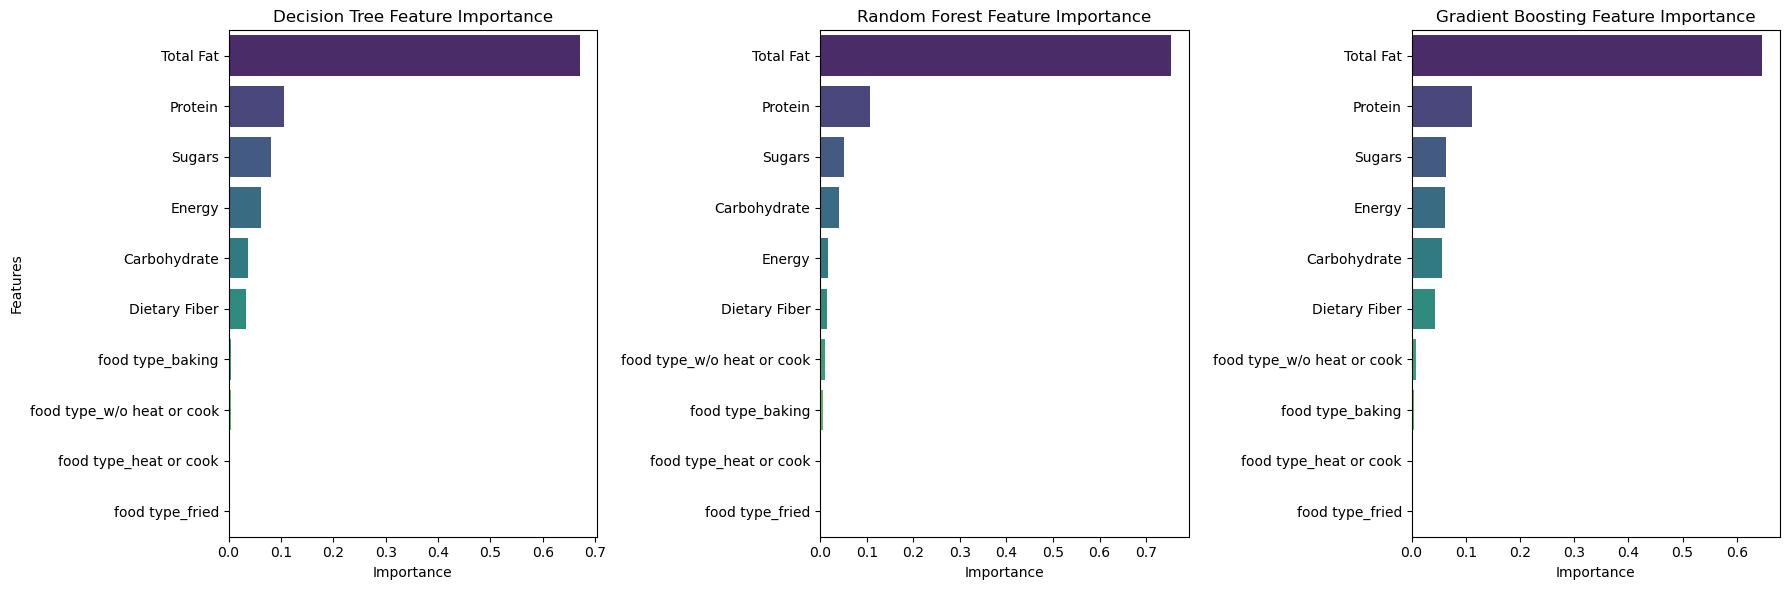

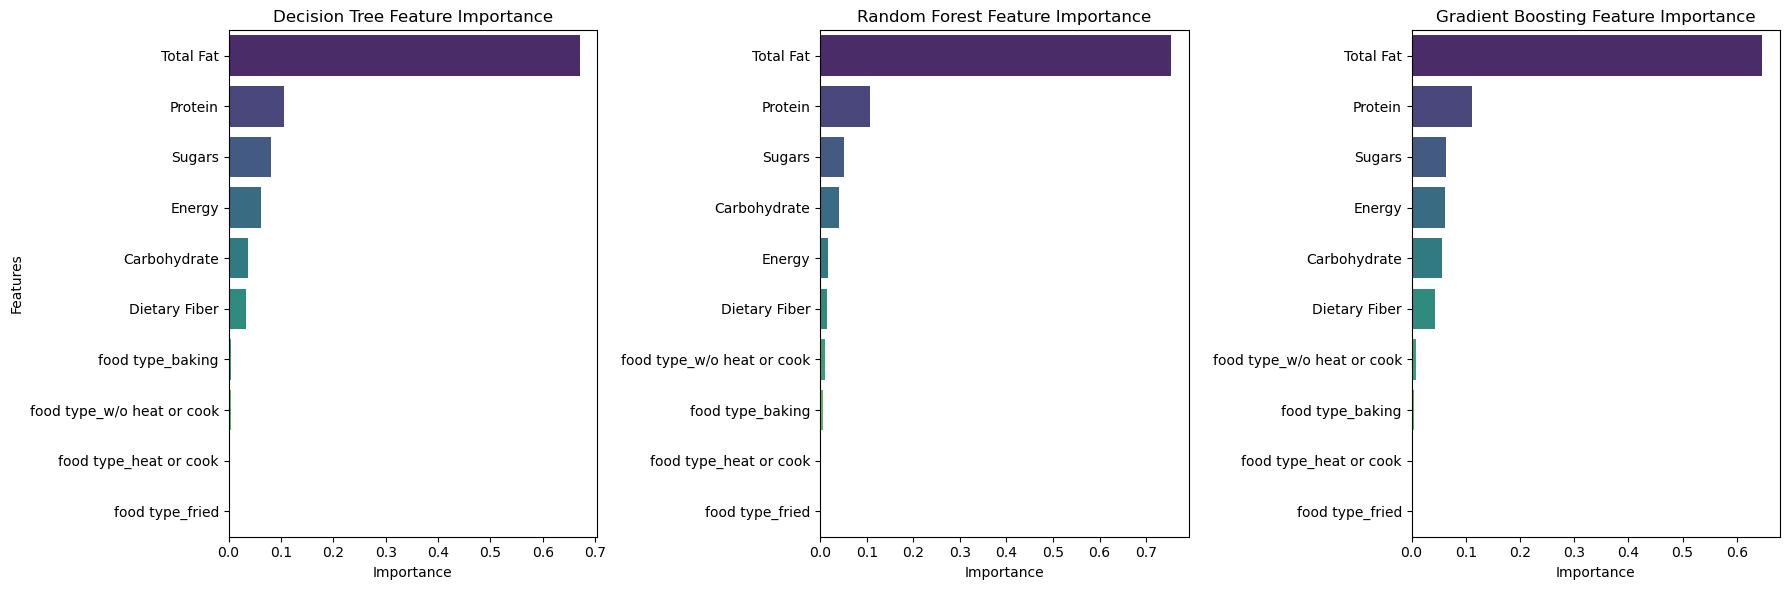

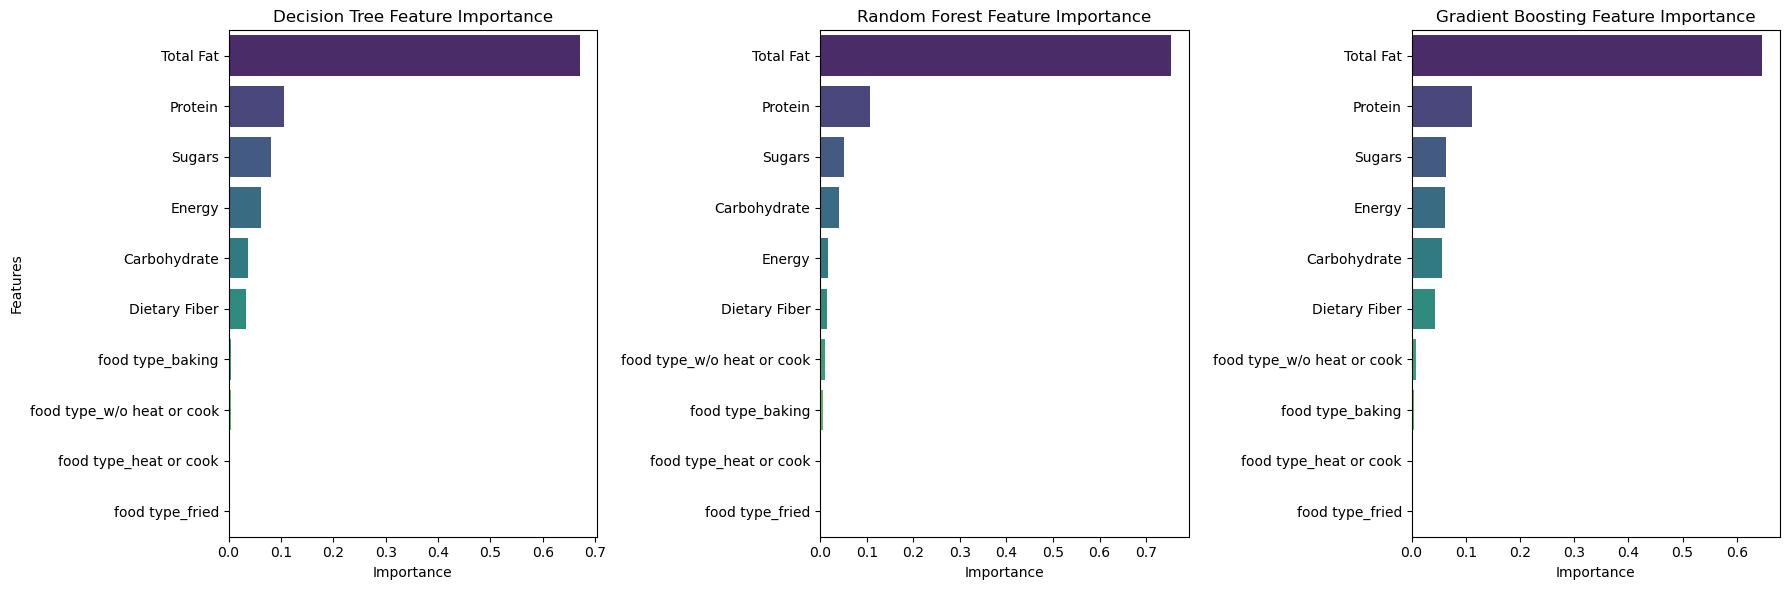

In [26]:
for i in range(3):
    # print(dietary.columns[i])
    # Fit the models
    tree_regressor = DecisionTreeRegressor(random_state=2).fit(X, y)
    gb_regressor = GradientBoostingRegressor(random_state=2).fit(X, y)
    rf_regressor = RandomForestRegressor(random_state=2).fit(X, y)

    # Get feature importances
    tree_importance = tree_regressor.feature_importances_
    gb_importance = gb_regressor.feature_importances_
    rf_importance = rf_regressor.feature_importances_
    
    # Sort the feature importances in descending order
    tree_sorted_idx = np.argsort(tree_importance)[::-1]
    gb_sorted_idx = np.argsort(gb_importance)[::-1]
    rf_sorted_idx = np.argsort(rf_importance)[::-1]
    
    # Create subplots
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey= False)

    # Decision Tree
    sns.barplot(x=tree_importance[tree_sorted_idx], y=X.columns[tree_sorted_idx], palette="viridis", ax=axs[0])
    axs[0].set_title('Decision Tree Feature Importance')
    axs[0].set_xlabel('Importance')
    axs[0].set_ylabel('Features')

    # Random Forest
    sns.barplot(x=rf_importance[rf_sorted_idx], y=X.columns[rf_sorted_idx], palette="viridis", ax=axs[2])
    axs[1].set_title('Random Forest Feature Importance')
    axs[1].set_xlabel('Importance')
    axs[1].set_ylabel('')

    # Gradient Boosting
    sns.barplot(x=gb_importance[gb_sorted_idx], y=X.columns[gb_sorted_idx], palette="viridis", ax=axs[1])
    axs[2].set_title('Gradient Boosting Feature Importance')
    axs[2].set_xlabel('Importance')
    axs[2].set_ylabel('')

    plt.tight_layout()
    plt.show()


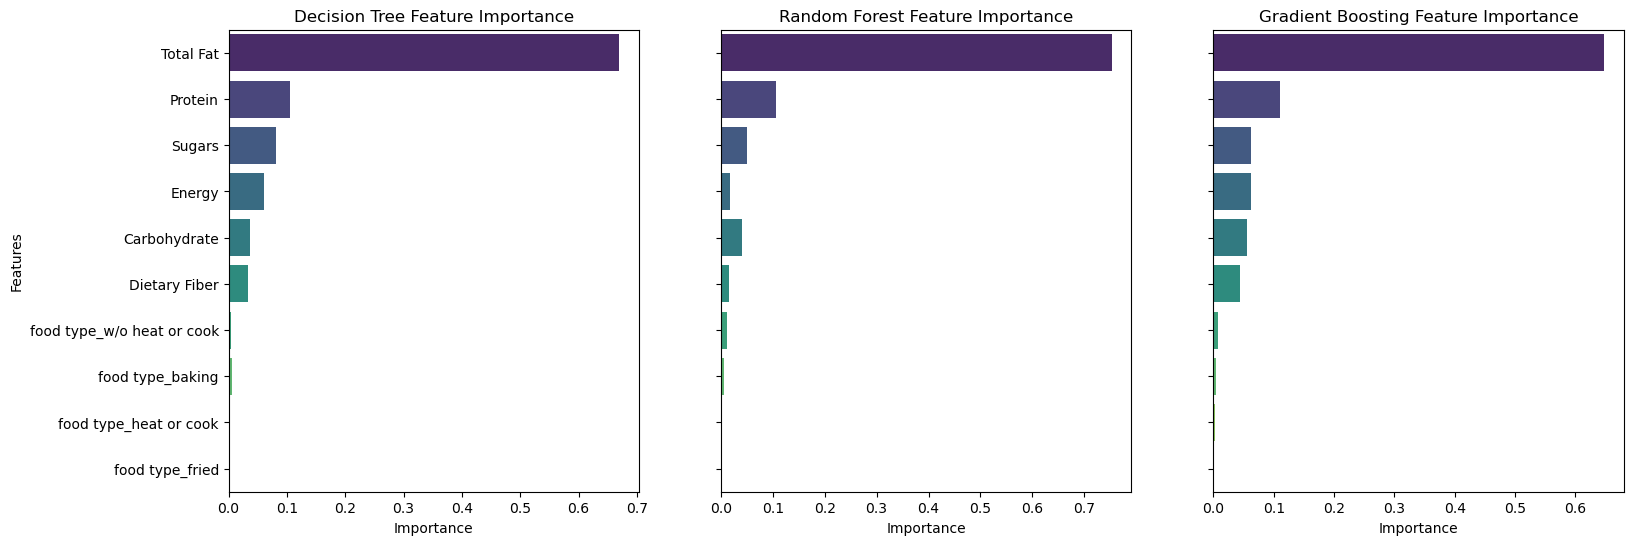

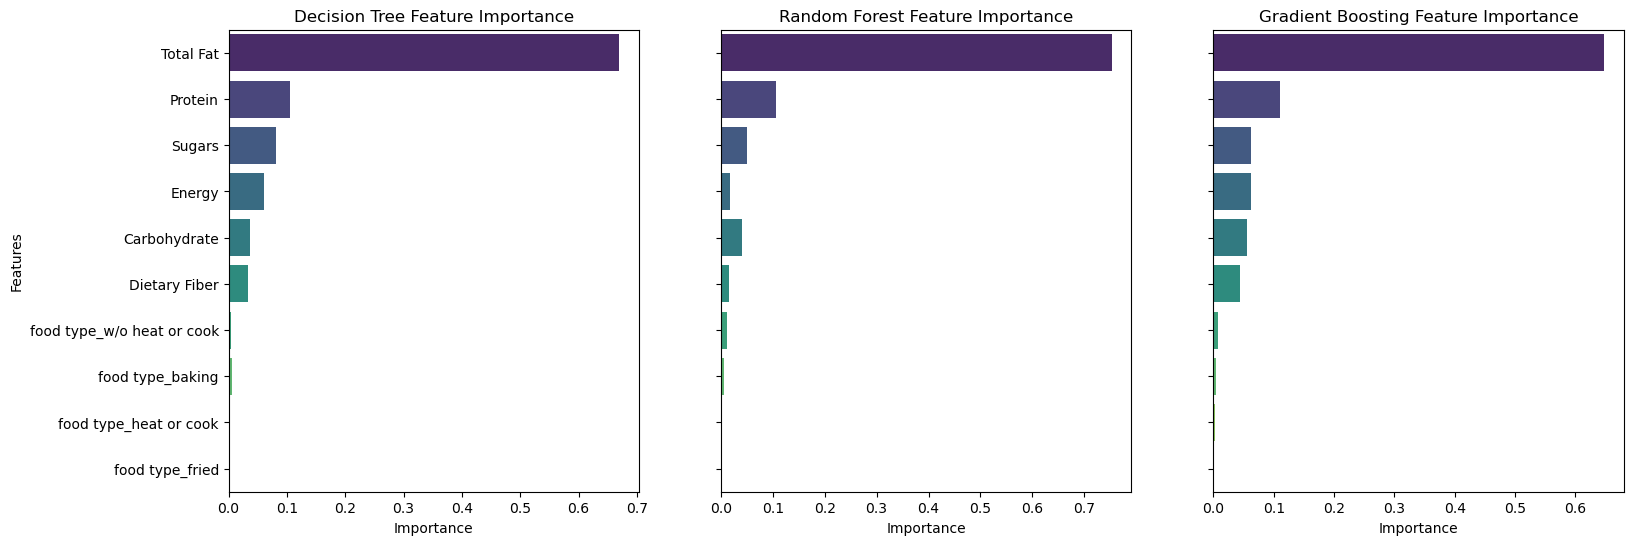

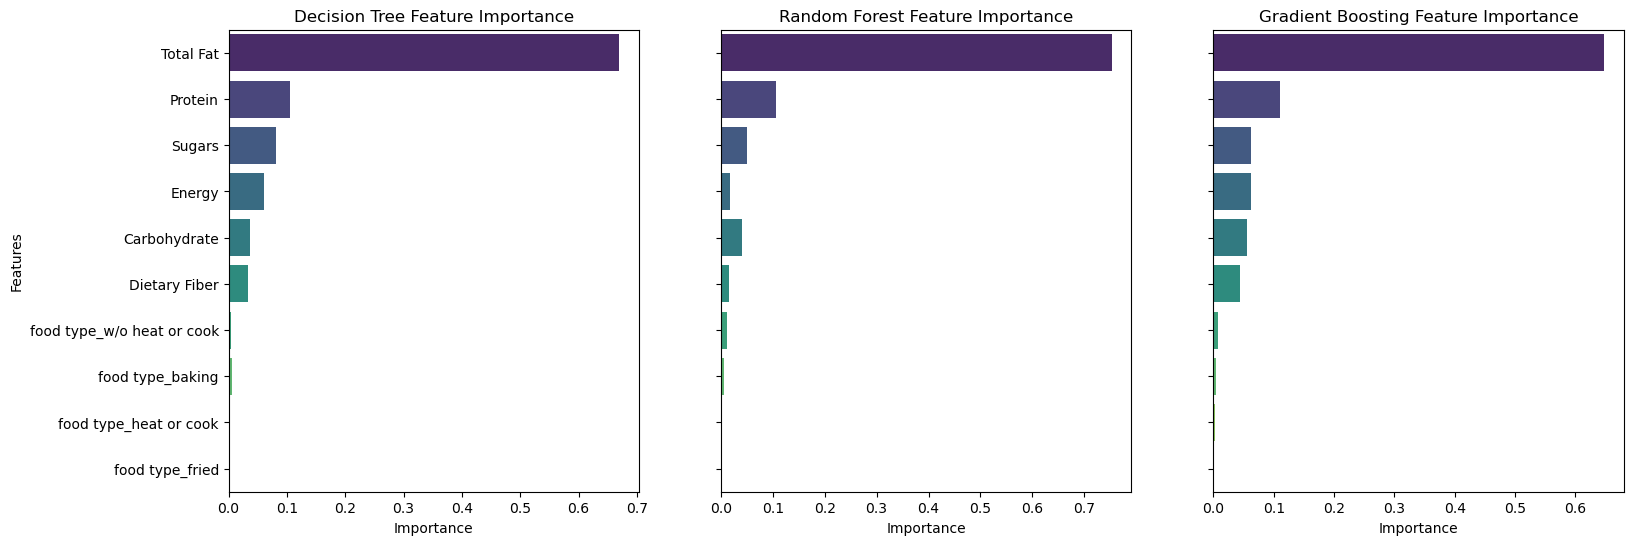

In [29]:
for i in range(3):
    # Fit the models
    tree_regressor = DecisionTreeRegressor(random_state=2).fit(X, y)
    gb_regressor = GradientBoostingRegressor(random_state=2).fit(X, y)
    rf_regressor = RandomForestRegressor(random_state=2).fit(X, y)

    # Get feature importances
    tree_importance = tree_regressor.feature_importances_
    gb_importance = gb_regressor.feature_importances_
    rf_importance = rf_regressor.feature_importances_

    # Calculate average feature importance
    average_importance = (tree_importance + gb_importance + rf_importance) / 3
    average_sorted_idx = np.argsort(average_importance)[::-1]

    # Create subplots
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey= True)

    # Decision Tree
    sns.barplot(x=tree_importance[average_sorted_idx], y=X.columns[average_sorted_idx], palette="viridis", ax=axs[0])
    axs[0].set_title('Decision Tree Feature Importance')
    axs[0].set_xlabel('Importance')
    axs[0].set_ylabel('Features')

    # Random Forest
    sns.barplot(x=rf_importance[average_sorted_idx], y=X.columns[average_sorted_idx], palette="viridis", ax=axs[2])
    axs[1].set_title('Random Forest Feature Importance')
    axs[1].set_xlabel('Importance')
    axs[1].set_ylabel('')
    
    # Gradient Boosting
    sns.barplot(x=gb_importance[average_sorted_idx], y=X.columns[average_sorted_idx], palette="viridis", ax=axs[1])
    axs[2].set_title('Gradient Boosting Feature Importance')
    axs[2].set_xlabel('Importance')
    axs[2].set_ylabel('')
